### Importación de datos



In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#agregamos una columna con el nombre del tienda


tienda['tienda'] = 'tienda 1'
tienda2['tienda'] = 'tienda 2'
tienda3['tienda'] = 'tienda 3'
tienda4['tienda'] = 'tienda 4'

# ahora unimos los 4 df en un df

df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

df_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda 1


#conociendo los datos

In [2]:
df_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [3]:
df_tiendas.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


#1. Análisis de facturación



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ventas_1= tienda['Precio'].sum()
ventas_2= tienda2['Precio'].sum()
ventas_3= tienda3['Precio'].sum()
ventas_4= tienda4['Precio'].sum()

total_ventas = ventas_1 + ventas_2 + ventas_3 + ventas_4

print(f' el total de venta de la tienda 1 fue ${round(ventas_1,0):,}')
print(f' el total de venta de la tienda 2 fue ${round(ventas_2,0):,}')
print(f' el total de venta de la tienda 3 fue ${round(ventas_3,0):,}')
print(f' el total de venta de la tienda 4 fue ${round(ventas_4,0):,}')

print(f' el total de ventas de las cuatros tiendas fue ${round(total_ventas,0):,}')

 el total de venta de la tienda 1 fue $1,150,880,400.0
 el total de venta de la tienda 2 fue $1,116,343,500.0
 el total de venta de la tienda 3 fue $1,098,019,600.0
 el total de venta de la tienda 4 fue $1,038,375,700.0
 el total de ventas de las cuatros tiendas fue $4,403,619,200.0


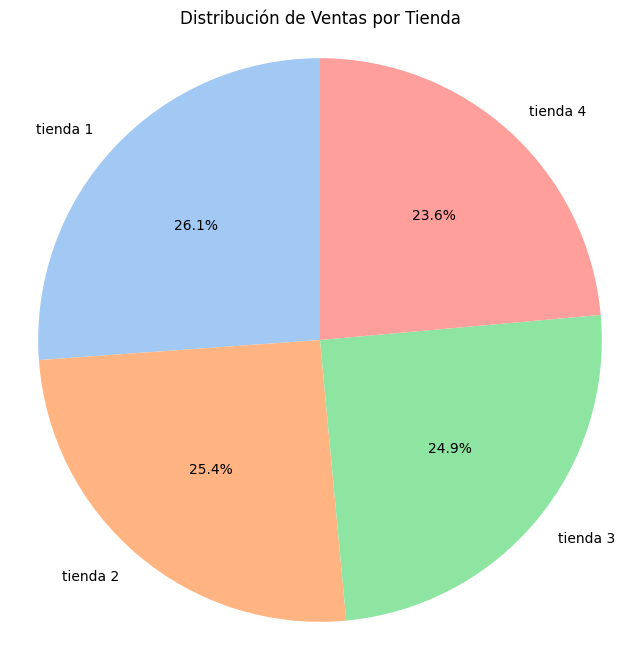

In [28]:
# venta % por tienda
ventas_por_tienda = df_tiendas.groupby('tienda')['Precio'].sum()

plt.figure(figsize=(8, 8))
plt.pie(ventas_por_tienda, labels=ventas_por_tienda.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Distribución de Ventas por Tienda')
plt.axis('equal')
plt.show()


###### segun esto se demuestra que la tienda que mas vendio fue la tienda 1, seguida por la tienda 2, luego la tienda 3 y por ultimo la tienda numero 4.Esto nos indica que la tienda 4 es menos actrativa en volumen total de venta


# 2. Ventas por categoría

In [7]:
Categoria = tienda['Categoría del Producto'].value_counts().reset_index()
Categoria

,Categoría del Producto,count
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


In [40]:
ventas_por_categoria = df_tiendas.groupby(['tienda','Categoría del Producto'])['Precio'].sum().reset_index()
pivot_categoria_vta= ventas_por_categoria.pivot(index='Categoría del Producto', columns='tienda', values='Precio')

pivot_categoria_vta['Total'] = pivot_categoria_vta.sum(axis=1)
#vta de mayor a menor
pivot_categoria_vta = pivot_categoria_vta.sort_values(by='Total', ascending=False)


display(pivot_categoria_vta)

tienda,tienda 1,tienda 2,tienda 3,tienda 4,Total
Categoría del Producto,,,,,
Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0,1.660576e+09
Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0,1.324751e+09
Muebles,187633700.0,176426300.0,201072100.0,192528900.0,7.576610e+08
Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0,3.487726e+08
Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0,1.429777e+08
Juguetes,17995700.0,15945400.0,19401100.0,20262200.0,7.360440e+07
Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0,5.757980e+07
Libros,8784900.0,10091200.0,9498700.0,9321300.0,3.769610e+07


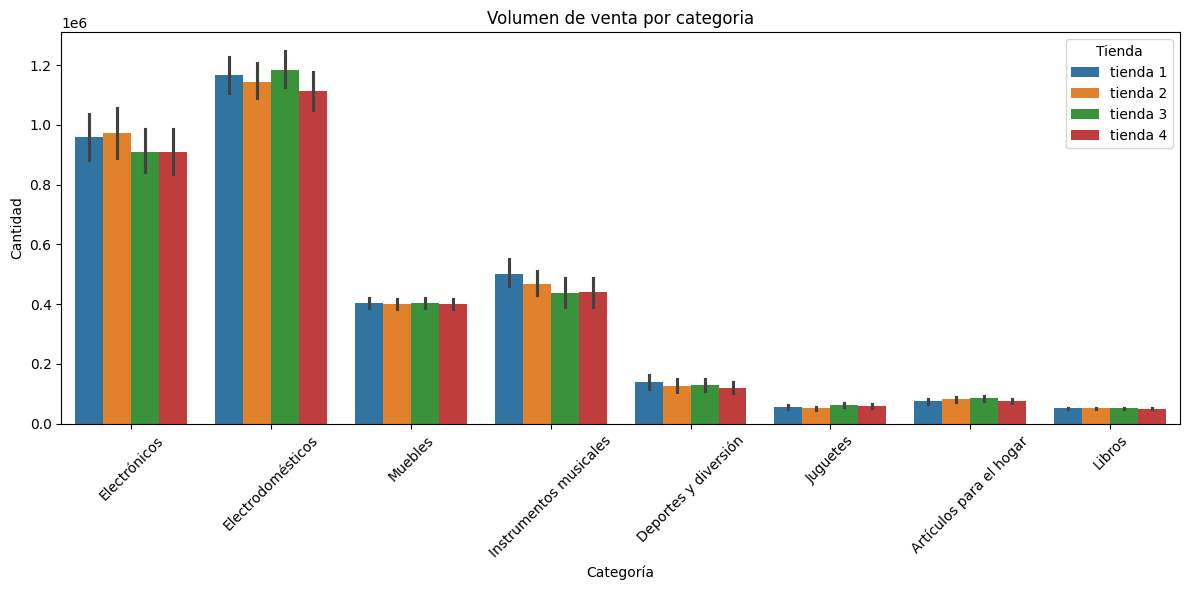

In [38]:
# Agrupar por categoría para obtener la suma total
vta_total = df_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

# Obtener el orden de las categorías (de mayor a menor)
orden_categorias = vta_total.index.tolist()

# Volver a graficar con el orden deseado
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_tiendas,
    x='Categoría del Producto',
    y='Precio',
    hue='tienda',
    order=orden_categorias
    )

plt.title('Volumen de venta por categoria')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

Las ventas mas altas se encuentran en electronicas y electrodomesticos, seguido por muebles. en estas 3 categorias se observa que representan el mayor volumen de venta

# 3. Calificación promedio de la tienda


In [10]:
estrellas = round(df_tiendas.groupby('tienda')['Calificación'].mean().sort_values(ascending=False),2)
estrellas

,Calificación
tienda,
tienda 3,4.05
tienda 2,4.04
tienda 4,4.00
tienda 1,3.98


In [11]:
# Agrupamos por tienda y calificación, y contamos el número de ocurrencias
conteo_estrellas_por_tienda = df_tiendas.groupby(['tienda', 'Calificación']).size().unstack(fill_value=0)

print(conteo_estrellas_por_tienda)

Calificación    1   2    3    4     5
tienda                               
tienda 1      319  86  218  444  1292
tienda 2      273  93  209  482  1302
tienda 3      297  79  193  434  1356
tienda 4      310  85  210  453  1300


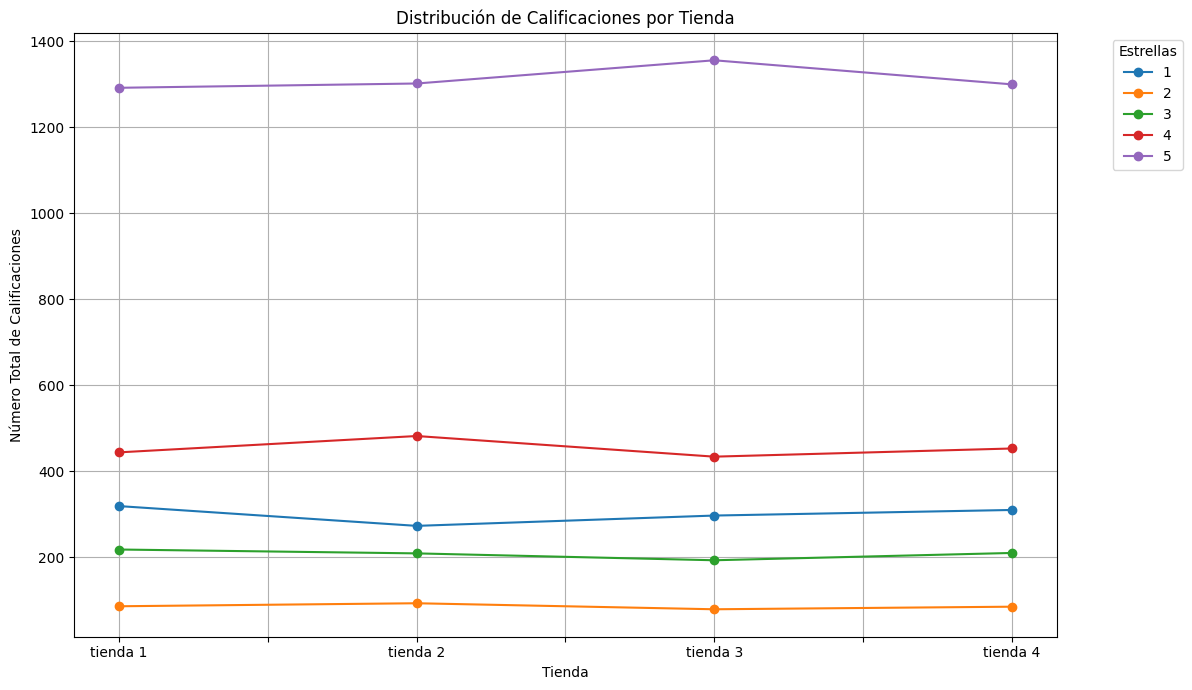

In [29]:
# graficamos por tienda por cantidad de estrellas

conteo_estrellas_por_tienda.plot(kind='line', figsize=(12, 7), marker='o')

# Añadimos títulos y etiquetas
plt.title('Distribución de Calificaciones por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Número Total de Calificaciones')
plt.xticks(rotation=0)
plt.legend(title='Estrellas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

La tienda 1 es la que posee un menor desempeño en calificacion, esto se debe revisar, dado que es la que presenta el mayor volumen de venta, de todas formas la diferencia entre la tienda 3 mejor calificada y la tienda 1, es munimo

# 4. Productos más y menos vendidos

In [46]:
# se crea df con los productos mas vendidos por tienda y total
Mas_vendidos = df_tiendas.groupby(['tienda', 'Producto'])['Precio'].sum().sort_values(ascending=False)
Mas_vendidos.head(10)

,,Precio
tienda,Producto,
tienda 1,TV LED UHD 4K,142150200.0
tienda 2,Iphone 15,113225800.0
tienda 1,Refrigerador,112143300.0
tienda 2,TV LED UHD 4K,103375000.0
tienda 3,Refrigerador,99889700.0
tienda 1,Iphone 15,97902200.0
tienda 2,Refrigerador,97632500.0
tienda 4,Iphone 15,96697500.0
tienda 3,TV LED UHD 4K,96669100.0


In [47]:

menos_vendidos = df_tiendas.groupby(['tienda', 'Producto'])['Precio'].sum().sort_values(ascending=True)
menos_vendidos.head(10)

tienda    Producto          
tienda 3  Cubo mágico 8x8       640400.0
tienda 2  Cubo mágico 8x8       643600.0
tienda 1  Cuerda para saltar    652800.0
          Dinosaurio Rex        688900.0
          Cubo mágico 8x8       696900.0
tienda 4  Cuerda para saltar    704800.0
          Cubo mágico 8x8       748400.0
tienda 2  Dinosaurio Rex        770300.0
tienda 3  Dinosaurio Rex        795600.0
          Cuerda para saltar    853800.0
Name: Precio, dtype: float64

Se observa que la tienda 1 y 2 lideran los productos mas vendidos, mientras que la tienda 4, presenta un debil poscisionamiento en ambas tablas y la tienda 3, esta mas presente en los productos menos vendidos.

# 5. Envío promedio por tienda

In [31]:
#se calcula el envio promedio por tienda

Costo_promedio_de_envio = round(df_tiendas.groupby('tienda')['Costo de envío'].mean().sort_values(ascending=False),2)
Costo_promedio_de_envio

,Costo de envío
tienda,
tienda 1,26018.61
tienda 2,25216.24
tienda 3,24805.68
tienda 4,23459.46


LA tienda 1 posee un mayor costo de envio, lo que se debe revisar dado que si bien las ventas son mayores en la tienda 1, puede que la utilidad no lo sea.

#Conclusion

El Señor Juan deberia cerrar la tienda 4, pero intentando preservar los departamentos de logistica y servicio al cliente, distribuyendo el conocimiento en las 3 tiendas restantes, para traspasar este conocimiento, para mejorar la experiencia al cliente y reducir los costos de envios.  